In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from scipy.interpolate import interp1d
from scipy import signal

import xlrd
from itertools import groupby

from statistics import mean
from matplotlib import cm
import csv

from scipy.spatial.distance import cdist
from scipy.signal import resample, firwin, lfilter
from scipy.stats import variation

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pathfp=r'F:\KyotoUdata\EEG\FP'
filesfp=sorted(os.listdir(pathfp))
pathsf=r'F:\KyotoUdata\EEG\SF'
filessf=sorted(os.listdir(pathsf))
pathre=r'F:\KyotoUdata\EEG\RE'
filesre=sorted(os.listdir(pathre))
pathst=r'F:\KyotoUdata\EEG\ST'
filesst=sorted(os.listdir(pathst))

In [3]:
datafpm=np.empty((len(filesfp),1),dtype=object)
datasfm=np.empty((len(filessf),1),dtype=object)
datarem=np.empty((len(filesre),1),dtype=object)
datastm=np.empty((len(filesst),1),dtype=object)

In [4]:
datafpc=np.empty((len(filesfp),1),dtype=object)
datasfc=np.empty((len(filessf),1),dtype=object)
datarec=np.empty((len(filesre),1),dtype=object)
datastc=np.empty((len(filesst),1),dtype=object)

In [5]:
headfpm=np.empty((len(filesfp),1),dtype=object)
headsfm=np.empty((len(filessf),1),dtype=object)
headrem=np.empty((len(filesre),1),dtype=object)
headstm=np.empty((len(filesst),1),dtype=object)

In [6]:
headfpc=np.empty((len(filesfp),1),dtype=object)
headsfc=np.empty((len(filessf),1),dtype=object)
headrec=np.empty((len(filesre),1),dtype=object)
headstc=np.empty((len(filesst),1),dtype=object)

In [7]:
def removespace(listin):
    for i in listin:
        if '' in listin:
            listin.remove('')
    return listin

In [8]:
def dataread(pathin):
    datap= pd.read_csv(pathin)
    columnlen=len(datap.iloc[:,0])
    #print(columnlen)
    head=[]
    with open (pathin) as f:
        test = list(csv.reader(f, delimiter=" "))
        test1=[x for x in test[:][0] if x!='']
        rowlen=len(test1)
    data=np.zeros((rowlen-1,columnlen+1))
    with open (pathin) as f:
        test = list(csv.reader(f, delimiter=" "))
        for i in range(columnlen+1):
            tem=[x for x in test[:][i] if x!='']
            data[:,i]=tem[1:]
            head.append(tem[0])
    return head,data

In [23]:
for i in range(len(filesfp)):
    headfp,datafp=dataread(pathfp+'\\'+filesfp[i])
    headsf,datasf=dataread(pathsf+'\\'+filessf[i])
    headre,datare=dataread(pathre+'\\'+filesre[i])
    headst,datast=dataread(pathst+'\\'+filesst[i])
    #print(headfp[:16],headfp[18:-1])
    headfpc[i]=headfp[16]
    headfpm[i]=headfp[-2]
    headsfc[i]=headsf[16]
    headsfm[i]=headsf[-2]
    headrec[i]=headre[16]
    headrem[i]=headre[-2]
    headstc[i]=headst[16]
    headstm[i]=headst[-2]
    
    datafpc[i]=[datafp[:,16]]
    datafpm[i]=[datafp[:,-2]]
    datasfc[i]=[datasf[:,16]]
    datasfm[i]=[datasf[:,-2]]
    datarec[i]=[datare[:,16]]
    datarem[i]=[datare[:,-2]]
    datastc[i]=[datast[:,16]]
    datastm[i]=[datast[:,-2]]

In [24]:
bdatam=np.empty((len(filesfp),1),dtype=object)
bdatac=np.empty((len(filesfp),1),dtype=object)

In [25]:
def datacombine(datafpin,datasfin,datarein,datastin,datacin):
    for i in range(len(datafpin)):
        datacin[i]=[np.r_[datafpin[i][0],datasfin[i][0],datarein[i][0],datastin[i][0]]]
    return datacin

In [26]:
bdatam=datacombine(datafpm,datasfm,datarem,datastm,bdatam)
bdatac=datacombine(datafpc,datasfc,datarec,datastc,bdatac)

(-2000.0, 2000.0)

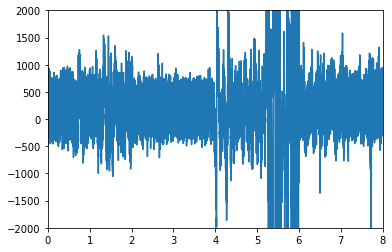

In [29]:
xlabel=np.arange(len(bdatam[0][0]))/500/60
#plt.plot(xlabel,bdatam[0][0][:,1])
plt.plot(xlabel,bdatam[0][0])
plt.xlim(0,8)
plt.ylim(-2000,2000)

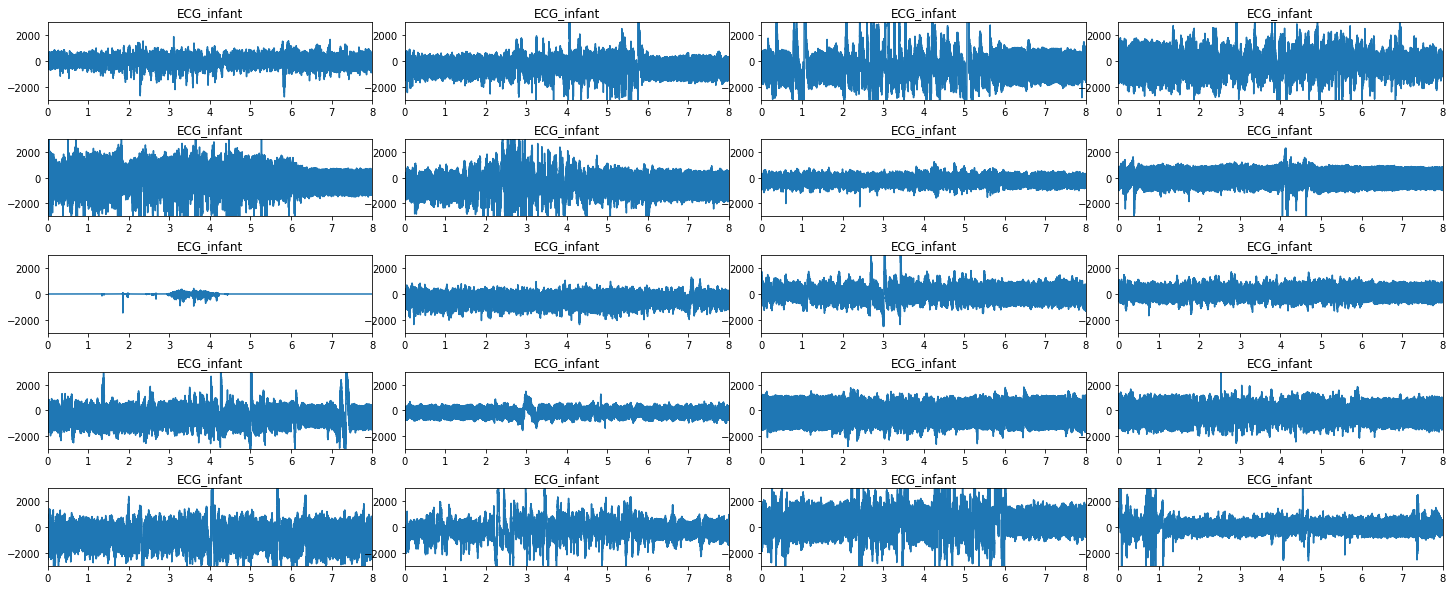

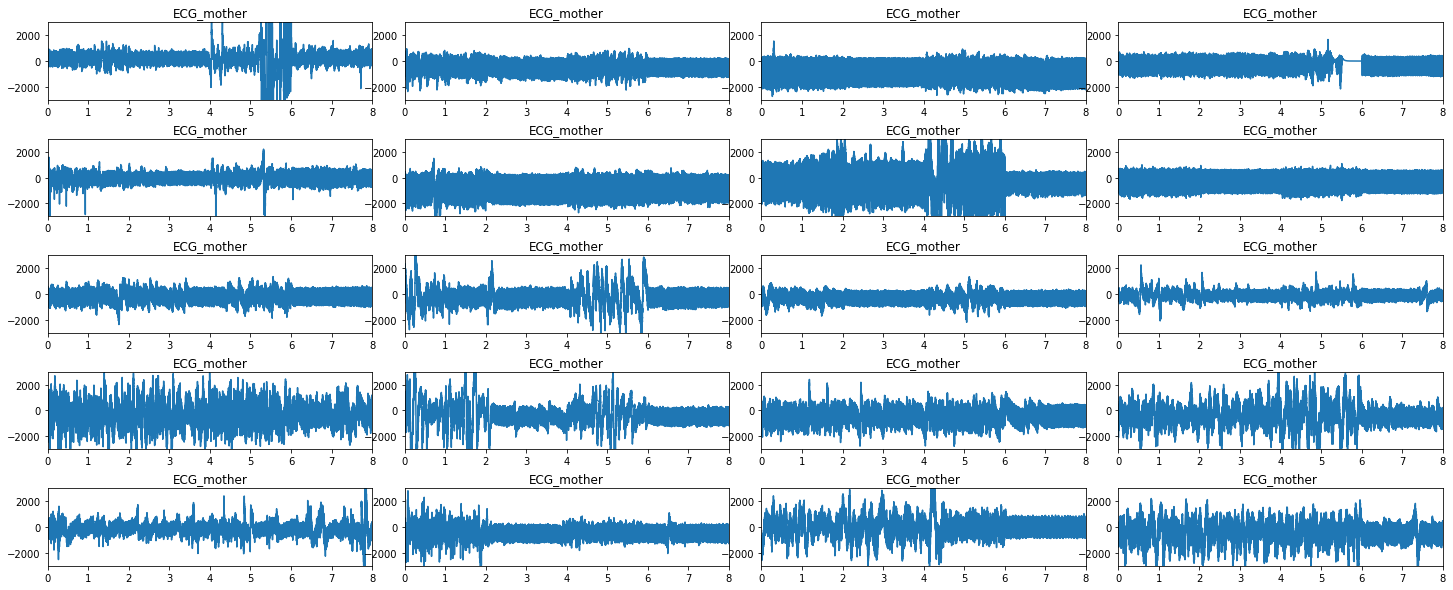

In [31]:
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatac)//4+(len(bdatac)%4>0)
for i in range(len(bdatac)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatac[i][0]))/60/500
    plt.plot(xlabel,bdatac[i][0])
    plt.xlim(0,8)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_infant')
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatam)//4+(len(bdatam)%4>0)
for i in range(len(bdatam)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatam[i][0]))/60/500
    plt.plot(xlabel,bdatam[i][0])
    plt.xlim(0,8)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_mother')

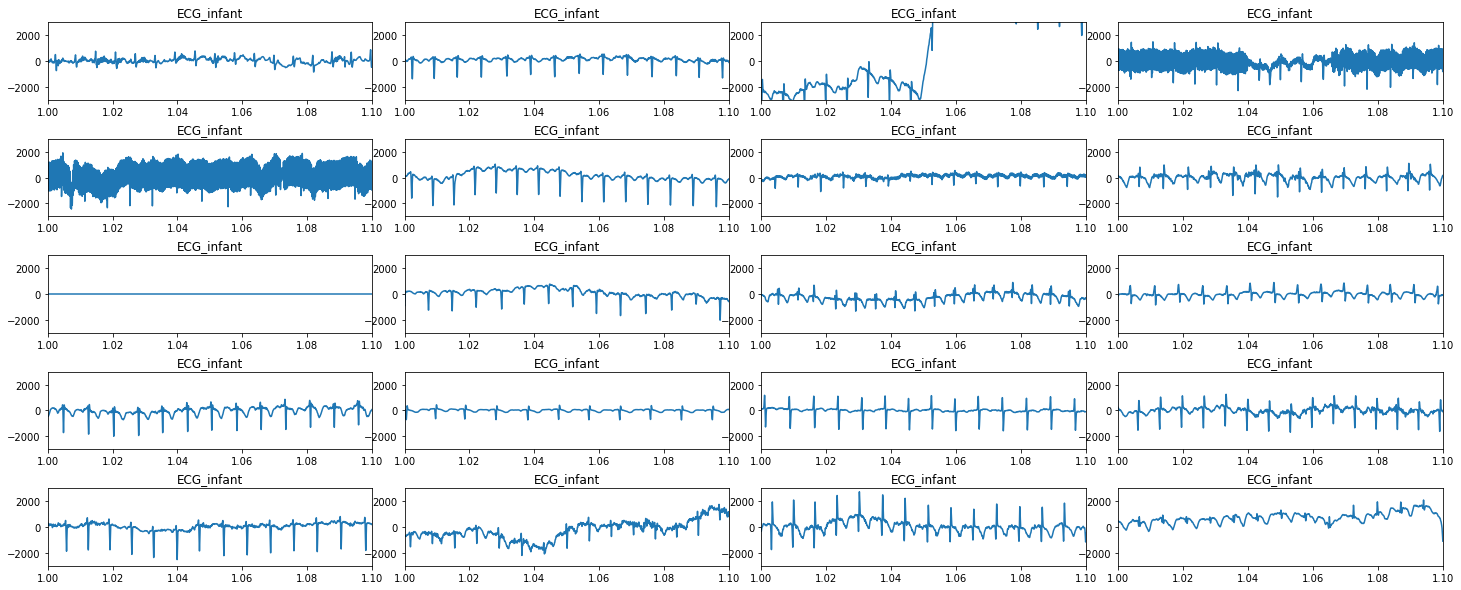

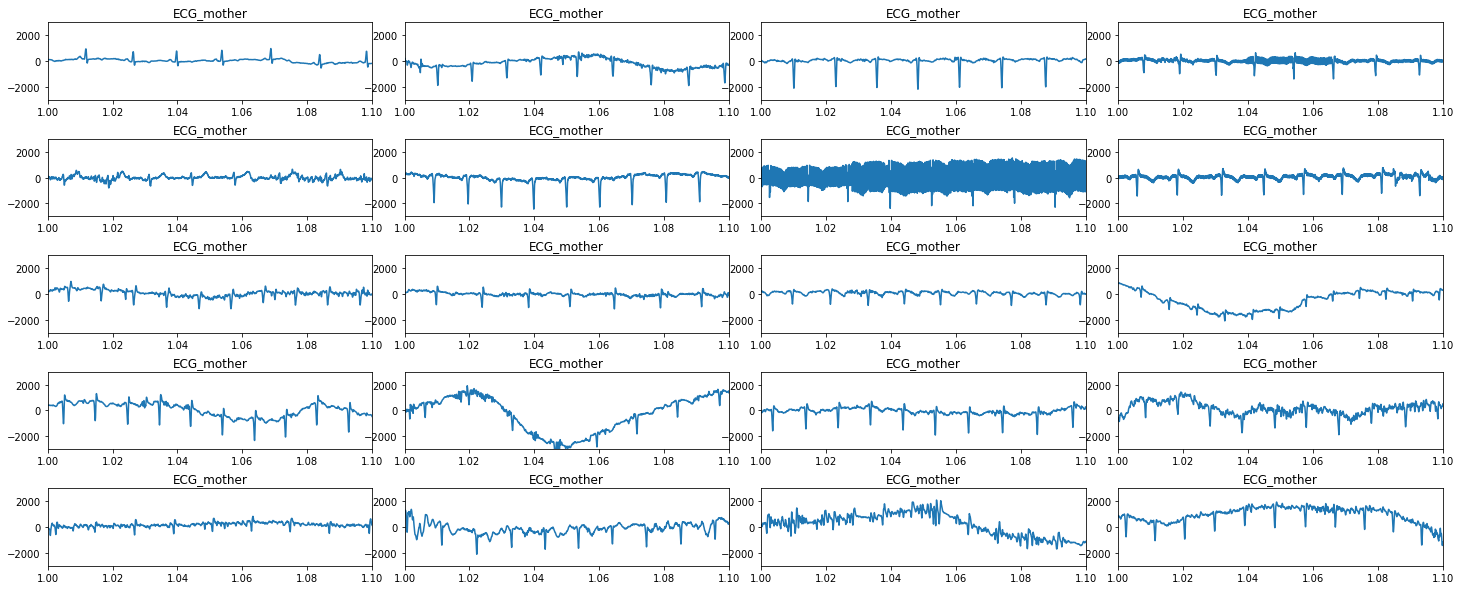

In [32]:
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatac)//4+(len(bdatac)%4>0)
for i in range(len(bdatac)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatac[i][0]))/60/500
    plt.plot(xlabel,bdatac[i][0])
    plt.xlim(1,1.1)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_infant')
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatam)//4+(len(bdatam)%4>0)
for i in range(len(bdatam)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatam[i][0]))/60/500
    plt.plot(xlabel,bdatam[i][0])
    plt.xlim(1,1.1)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_mother')

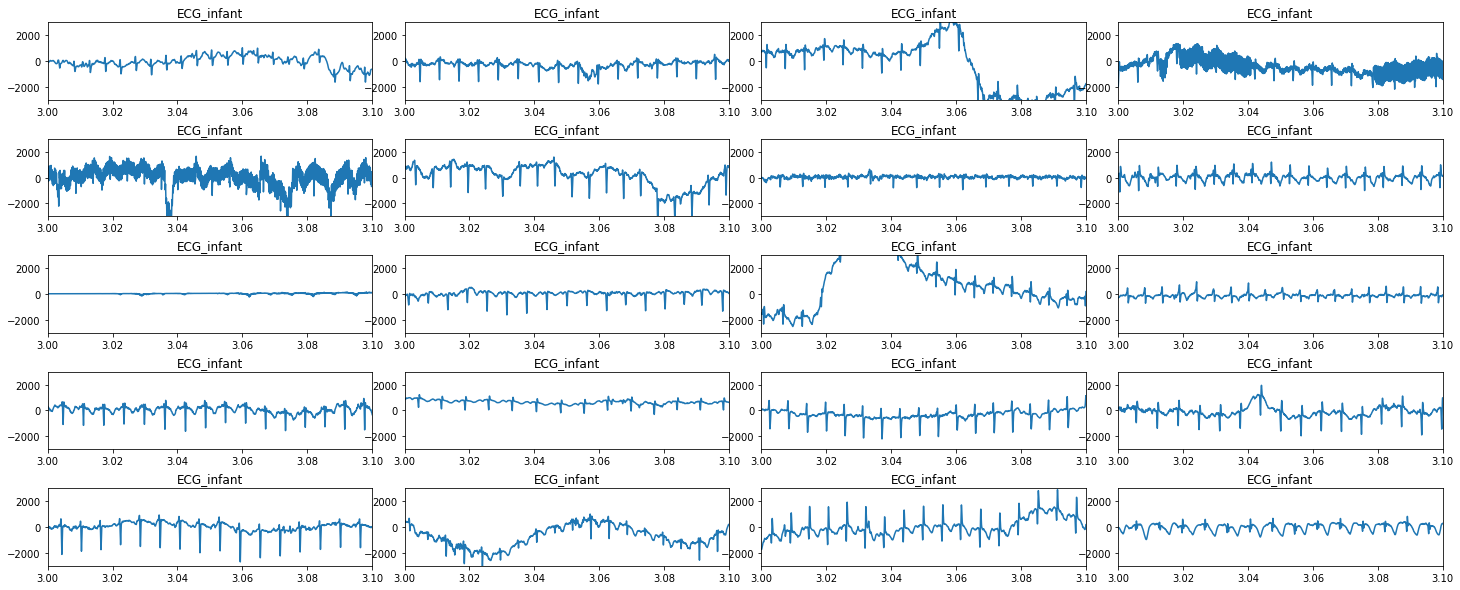

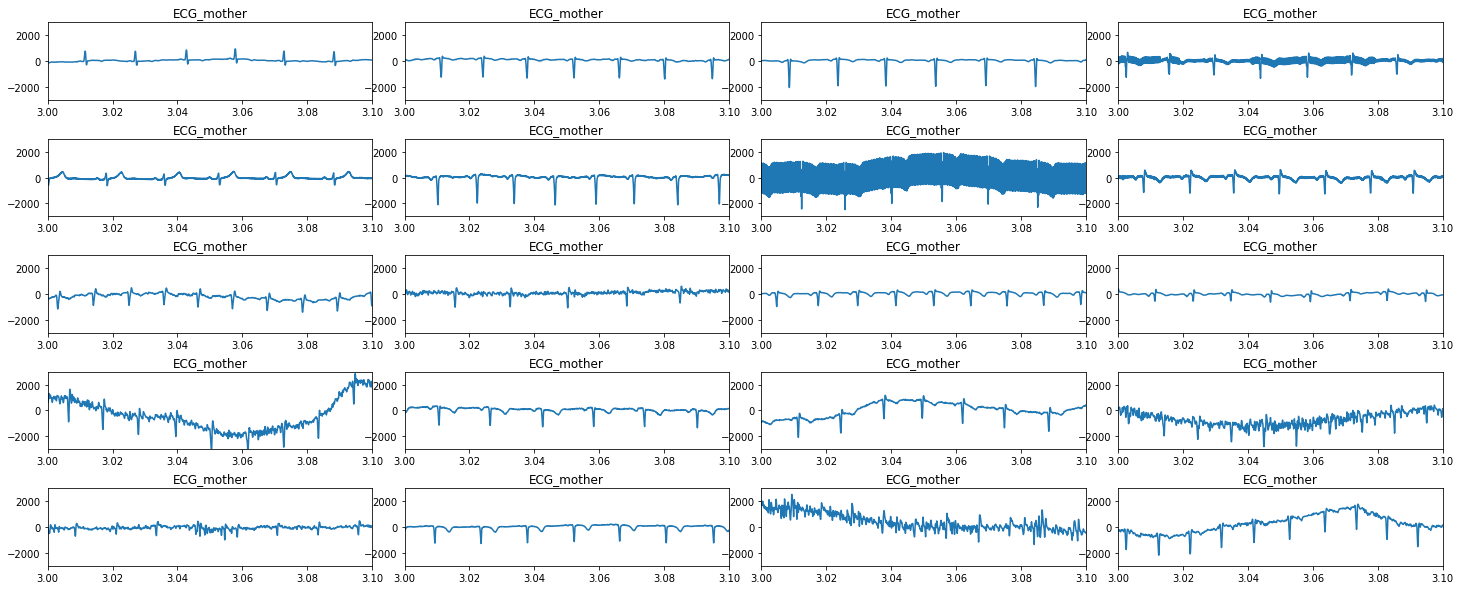

In [33]:
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatac)//4+(len(bdatac)%4>0)
for i in range(len(bdatac)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatac[i][0]))/60/500
    plt.plot(xlabel,bdatac[i][0])
    plt.xlim(3,3.1)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_infant')
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatam)//4+(len(bdatam)%4>0)
for i in range(len(bdatam)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatam[i][0]))/60/500
    plt.plot(xlabel,bdatam[i][0])
    plt.xlim(3,3.1)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_mother')

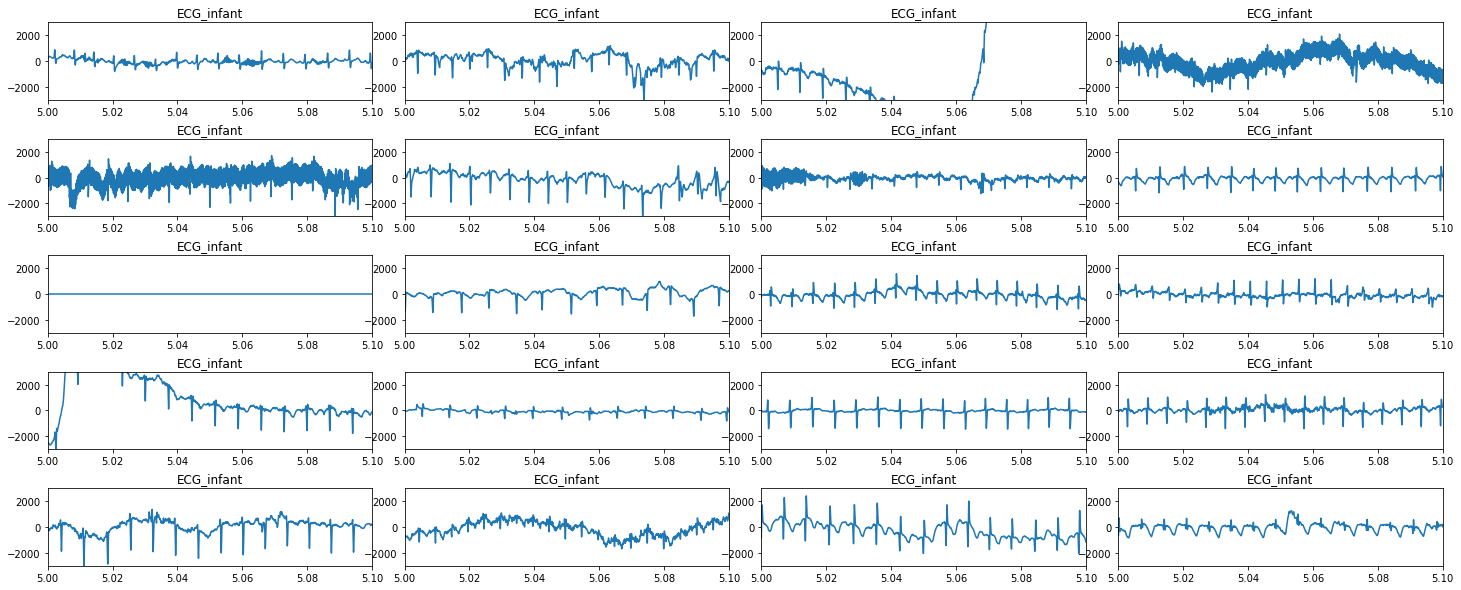

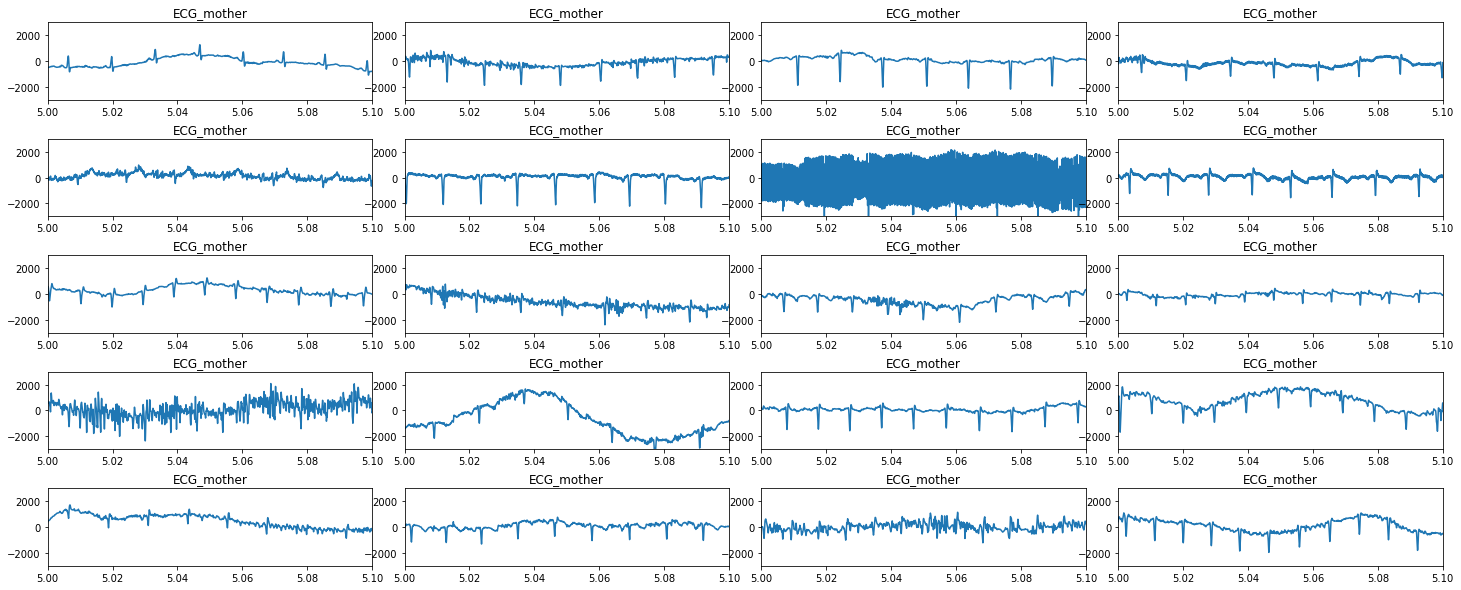

In [34]:
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatac)//4+(len(bdatac)%4>0)
for i in range(len(bdatac)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatac[i][0]))/60/500
    plt.plot(xlabel,bdatac[i][0])
    plt.xlim(5,5.1)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_infant')
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatam)//4+(len(bdatam)%4>0)
for i in range(len(bdatam)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatam[i][0]))/60/500
    plt.plot(xlabel,bdatam[i][0])
    plt.xlim(5,5.1)
    plt.ylim(-3000,3000)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.title('ECG_mother')

In [ ]:
sampling_rate = 500
downsample_factor = 1  # In this case, downsample by 1 second

In [96]:
headfp1,datafp1=dataread(pathfp+'\\'+filesfp[0])
headsf1,datasf1=dataread(pathsf+'\\'+filessf[0])
headre1,datare1=dataread(pathre+'\\'+filesre[0])
headst1,datast1=dataread(pathst+'\\'+filesst[0])

In [97]:
print(headfp1[16],headfp1[-2])

ECG_1 ECG_2


In [98]:
testfpc=datafp1[:,16]
testfpm=datafp1[:,-2]
testsfc=datasf1[:,16]
testsfm=datasf1[:,-2]
testrec=datare1[:,16]
testrem=datare1[:,-2]
teststc=datast1[:,16]
teststm=datast1[:,-2]

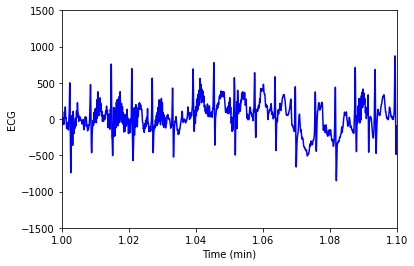

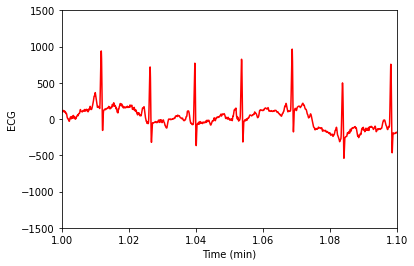

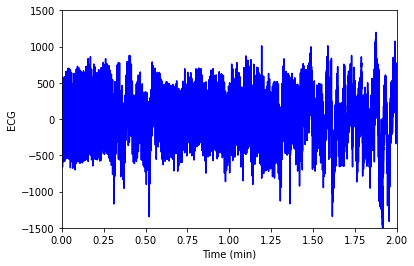

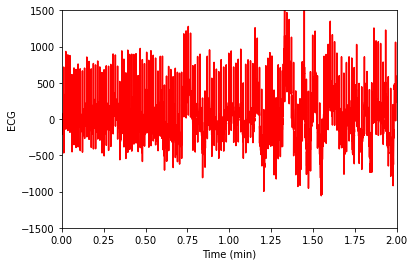

In [99]:
timefp=np.arange(len(testfpc))/500/60
plt.plot(timefp,testfpc,color='b')
plt.xlabel('Time (min)')
plt.ylabel('ECG')
plt.xlim(1,1.1)
plt.ylim(-1500,1500)
plt.show()
plt.plot(timefp,testfpm,color='r')
plt.xlabel('Time (min)')
plt.ylim(-1500,1500)
plt.ylabel('ECG')
plt.xlim(1,1.1)
plt.show()
plt.plot(timefp,testfpc,color='b')
plt.ylim(-1500,1500)
plt.xlim(0,2)
plt.xlabel('Time (min)')
plt.ylabel('ECG')
plt.show()
plt.plot(timefp,testfpm,color='r')
plt.xlim(0,2)
plt.ylim(-1500,1500)
plt.xlabel('Time (min)')
plt.ylabel('ECG')
plt.show()

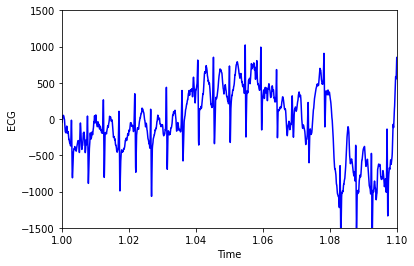

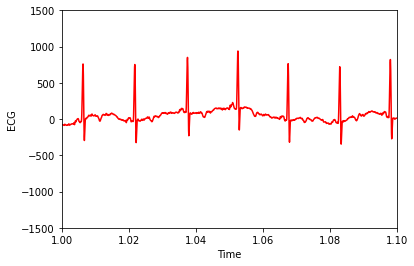

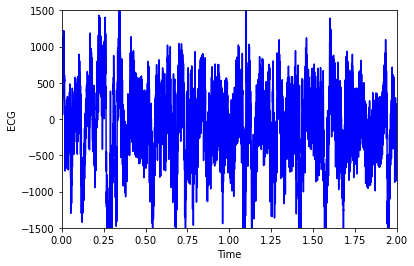

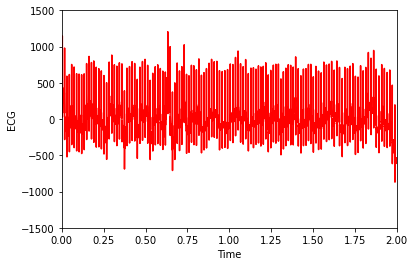

In [100]:
timesf=np.arange(len(testsfc))/500/60
plt.plot(timesf,testsfc,color='b')
plt.xlabel('Time')
plt.ylabel('ECG')
plt.xlim(1,1.1)
plt.ylim(-1500,1500)
plt.show()
plt.plot(timesf,testsfm,color='r')
plt.xlabel('Time')
plt.ylabel('ECG')
plt.xlim(1,1.1)
plt.ylim(-1500,1500)
plt.show()
plt.plot(timesf,testsfc,color='b')
plt.xlim(0,2)
plt.ylim(-1500,1500)
plt.xlabel('Time')
plt.ylabel('ECG')
plt.show()
plt.plot(timesf,testsfm,color='r')
plt.xlim(0,2)
plt.ylim(-1500,1500)
plt.xlabel('Time')
plt.ylabel('ECG')
plt.show()

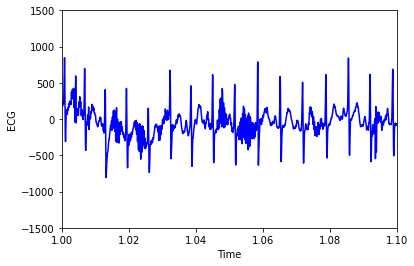

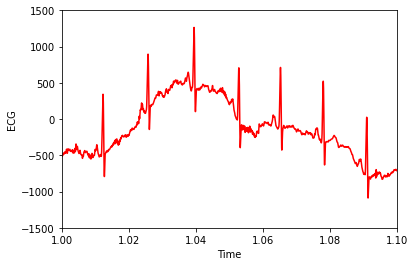

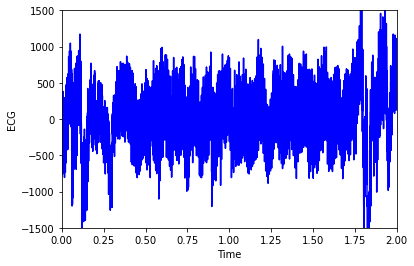

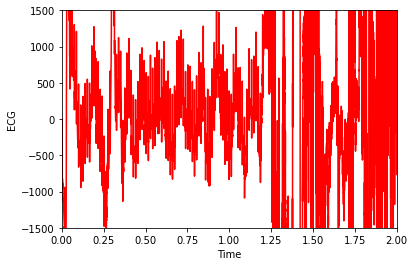

In [101]:
timere=np.arange(len(testrec))/500/60
plt.plot(timere,testrec,color='b')
plt.xlabel('Time')
plt.ylabel('ECG')
plt.xlim(1,1.1)
plt.ylim(-1500,1500)
plt.show()
plt.plot(timere,testrem,color='r')
plt.xlabel('Time')
plt.ylabel('ECG')
plt.xlim(1,1.1)
plt.ylim(-1500,1500)
plt.show()
plt.plot(timere,testrec,color='b')
plt.xlim(0,2)
plt.ylim(-1500,1500)
plt.xlabel('Time')
plt.ylabel('ECG')
plt.show()
plt.plot(timere,testrem,color='r')
plt.xlim(0,2)
plt.ylim(-1500,1500)
plt.xlabel('Time')
plt.ylabel('ECG')
plt.show()

In [102]:
def estimate_rsa(ecg_data, sampling_rate=500, resample_rate=5, infant=True):
    # Step 1: Resample the IBI time series to 5 Hz
    num_samples = int(len(ecg_data) * (resample_rate / sampling_rate))
    ibi_resampled = resample(ecg_data, num_samples)

    # Step 2: Apply a 51-point band-pass local cubic polynomial filter
    # We will use a Savitzky-Golay filter as an approximation
    from scipy.signal import savgol_filter
    filtered_ibi = savgol_filter(ibi_resampled, window_length=51, polyorder=3)

    # Step 3: Estimate and remove slow periodic and aperiodic components
    ibi_detrended = ibi_resampled - filtered_ibi

    # Step 4: Apply an FIR-type bandpass filter to isolate the frequency range
    if infant:
        lowcut = 0.3
        highcut = 1.3
    else:
        lowcut = 0.12
        highcut = 1.0

    nyquist = 0.5 * resample_rate
    low = lowcut / nyquist
    high = highcut / nyquist

    fir_coeff = firwin(numtaps=51, cutoff=[low, high], pass_zero=False)
    ibi_bandpassed = lfilter(fir_coeff, 1.0, ibi_detrended)

    # Step 5: Parse into epochs and calculate RSA magnitude
    window_size = 15 * resample_rate  # 15 seconds window
    step_size = int(0.2 * resample_rate)  # 200 ms step size
    rsa_values = []

    for start in range(0, len(ibi_bandpassed) - window_size, step_size):
        epoch = ibi_bandpassed[start:start + window_size]
        rsa_magnitude = np.log(np.var(epoch))
        rsa_values.append(rsa_magnitude)

    rsa_values = np.array(rsa_values)

    # The RSA values are estimated at the beginning of each sliding window
    return rsa_values

In [103]:
infant_rsa_fp = estimate_rsa(testfpc, infant=True)
mother_rsa_fp = estimate_rsa(testfpm, infant=True)
infant_rsa_sf = estimate_rsa(testsfc, infant=True)
mother_rsa_sf = estimate_rsa(testsfm, infant=True)
infant_rsa_re = estimate_rsa(testrec, infant=True)
mother_rsa_re = estimate_rsa(testrem, infant=True)
infant_rsa_st = estimate_rsa(teststc, infant=True)
mother_rsa_st = estimate_rsa(teststm, infant=True)

In [104]:
print(len(infant_rsa_sf),len(testfpc)/526)

525 114.36692015209125


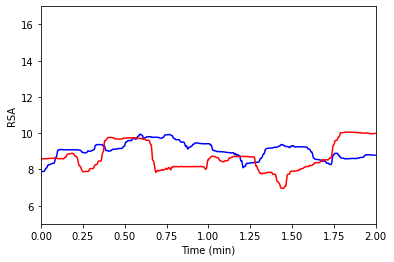

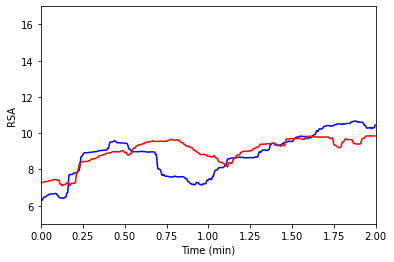

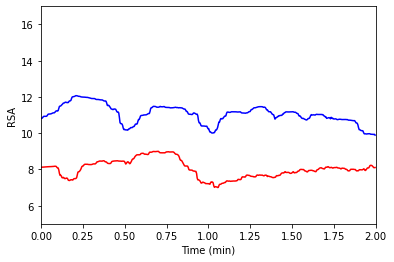

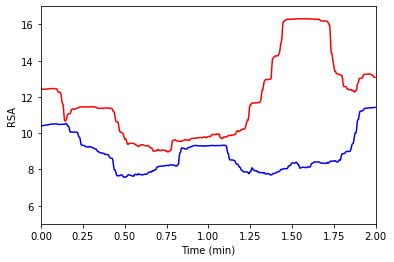

In [105]:
timest_rsa=np.arange(len(infant_rsa_st))/len(infant_rsa_st)*2
plt.plot(timest_rsa,infant_rsa_st,color='b')
plt.plot(timest_rsa,mother_rsa_st,color='r')
plt.xlim(0,2)
plt.ylim(5,17)
plt.xlabel('Time (min)')
plt.ylabel('RSA')
plt.show()

timefp_rsa=np.arange(len(infant_rsa_fp))/len(infant_rsa_fp)*2
plt.plot(timefp_rsa,infant_rsa_fp,color='b')
plt.plot(timefp_rsa,mother_rsa_fp,color='r')
plt.xlim(0,2)
plt.ylim(5,17)
plt.xlabel('Time (min)')
plt.ylabel('RSA')
plt.show()

timesf_rsa=np.arange(len(infant_rsa_sf))/len(infant_rsa_sf)*2
plt.plot(timesf_rsa,infant_rsa_sf,color='b')
plt.plot(timesf_rsa,mother_rsa_sf,color='r')
plt.xlim(0,2)
plt.ylim(5,17)
plt.xlabel('Time (min)')
plt.ylabel('RSA')
plt.show()

timere_rsa=np.arange(len(infant_rsa_re))/len(infant_rsa_re)*2
plt.plot(timere_rsa,infant_rsa_re,color='b')
plt.plot(timere_rsa,mother_rsa_re,color='r')
plt.xlim(0,2)
plt.ylim(5,17)
plt.xlabel('Time (min)')
plt.ylabel('RSA')
plt.show()